In [1]:
import gensim

You can download the `.vec` file containing all of the vectors from [here](https://fasttext.cc/docs/en/english-vectors.html). In this tutorial we'll use the 300-dimensional fastText vectors trained on a 2017 snapshot of Wikipedia (direct link [here](https://dl.fbaipublicfiles.com/fasttext/vectors-english/wiki-news-300d-1M.vec.zip)). Then you can change `vectors_loc` to point to wherever this file lives on your computer.

In [4]:
vectors_loc = "../../Datasets_and_Corpora/fastText/wiki-news-300d-1M.vec"

For the sake of speed, I added the `limit=10000` argument here so it only loads vectors for the first 10,000 words in the file. Since the lines in the file are ordered by frequency of the words within the corpus, this means loading the 10,000 most-frequent words. (Below a certain frequency threshold, we're only seeing the word a few times, so there's not much contextual information for the vectors to encode...)

In [6]:
ft_model = gensim.models.KeyedVectors.load_word2vec_format(vectors_loc, limit=10000)

In [7]:
ft_model.most_similar("Trump", topn=25)

[('Obama', 0.5756258964538574),
 ('Donald', 0.574673056602478),
 ('Putin', 0.5626336336135864),
 ('Hillary', 0.5620890855789185),
 ('Sanders', 0.5563629865646362),
 ('Clinton', 0.548007607460022),
 ('Carson', 0.5285506248474121),
 ('McCain', 0.5163815021514893),
 ('Romney', 0.513308048248291),
 ('GOP', 0.5006581544876099),
 ('Bush', 0.4991576671600342),
 ('Cruz', 0.4962676167488098),
 ('Salmond', 0.4898768365383148),
 ('Farage', 0.4860537052154541),
 ('Biden', 0.46970391273498535),
 ('ISIS', 0.4664161205291748),
 ('Barack', 0.4656114876270294),
 ('Netanyahu', 0.4645918607711792),
 ('Reagan', 0.4615655541419983),
 ('Republicans', 0.45875734090805054),
 ('Kerry', 0.4577403962612152),
 ('Bloomberg', 0.45472460985183716),
 ('Miliband', 0.45062223076820374),
 ('Snowden', 0.44994524121284485),
 ('Perry', 0.4494995176792145)]

In [11]:
# This is just code we'll need later on, allowing us to generate a t-SNE plot 
# (the "standard", though perhaps not best, way to visualize an embedding space)
from sklearn.manifold import TSNE
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
def tsne_plot(model):
    labels = []
    tokens = []
    for word in model.vocab:
        tokens.append(model[word])
        labels.append(word)
    tsne_model = TSNE(perplexity=40, n_components=2, init="pca", n_iter=2000, random_state=1948)
    new_values = tsne_model.fit_transform(tokens)
    my_x = new_values[:,0]
    my_y = new_values[:,1]
    plt.figure(figsize=(32, 32))
    a = pd.DataFrame({'x': my_x, 'y': my_y, 'val': labels})
    a_sample = a.sample(1500)
    counter = 0
    for i, point in a_sample.iterrows():
        plt.scatter(point['x'], point['y'])
        plt.text(point['x']+.02, point['y'], str(point['val']), fontsize=8)
        counter = counter + 1
    plt.show()

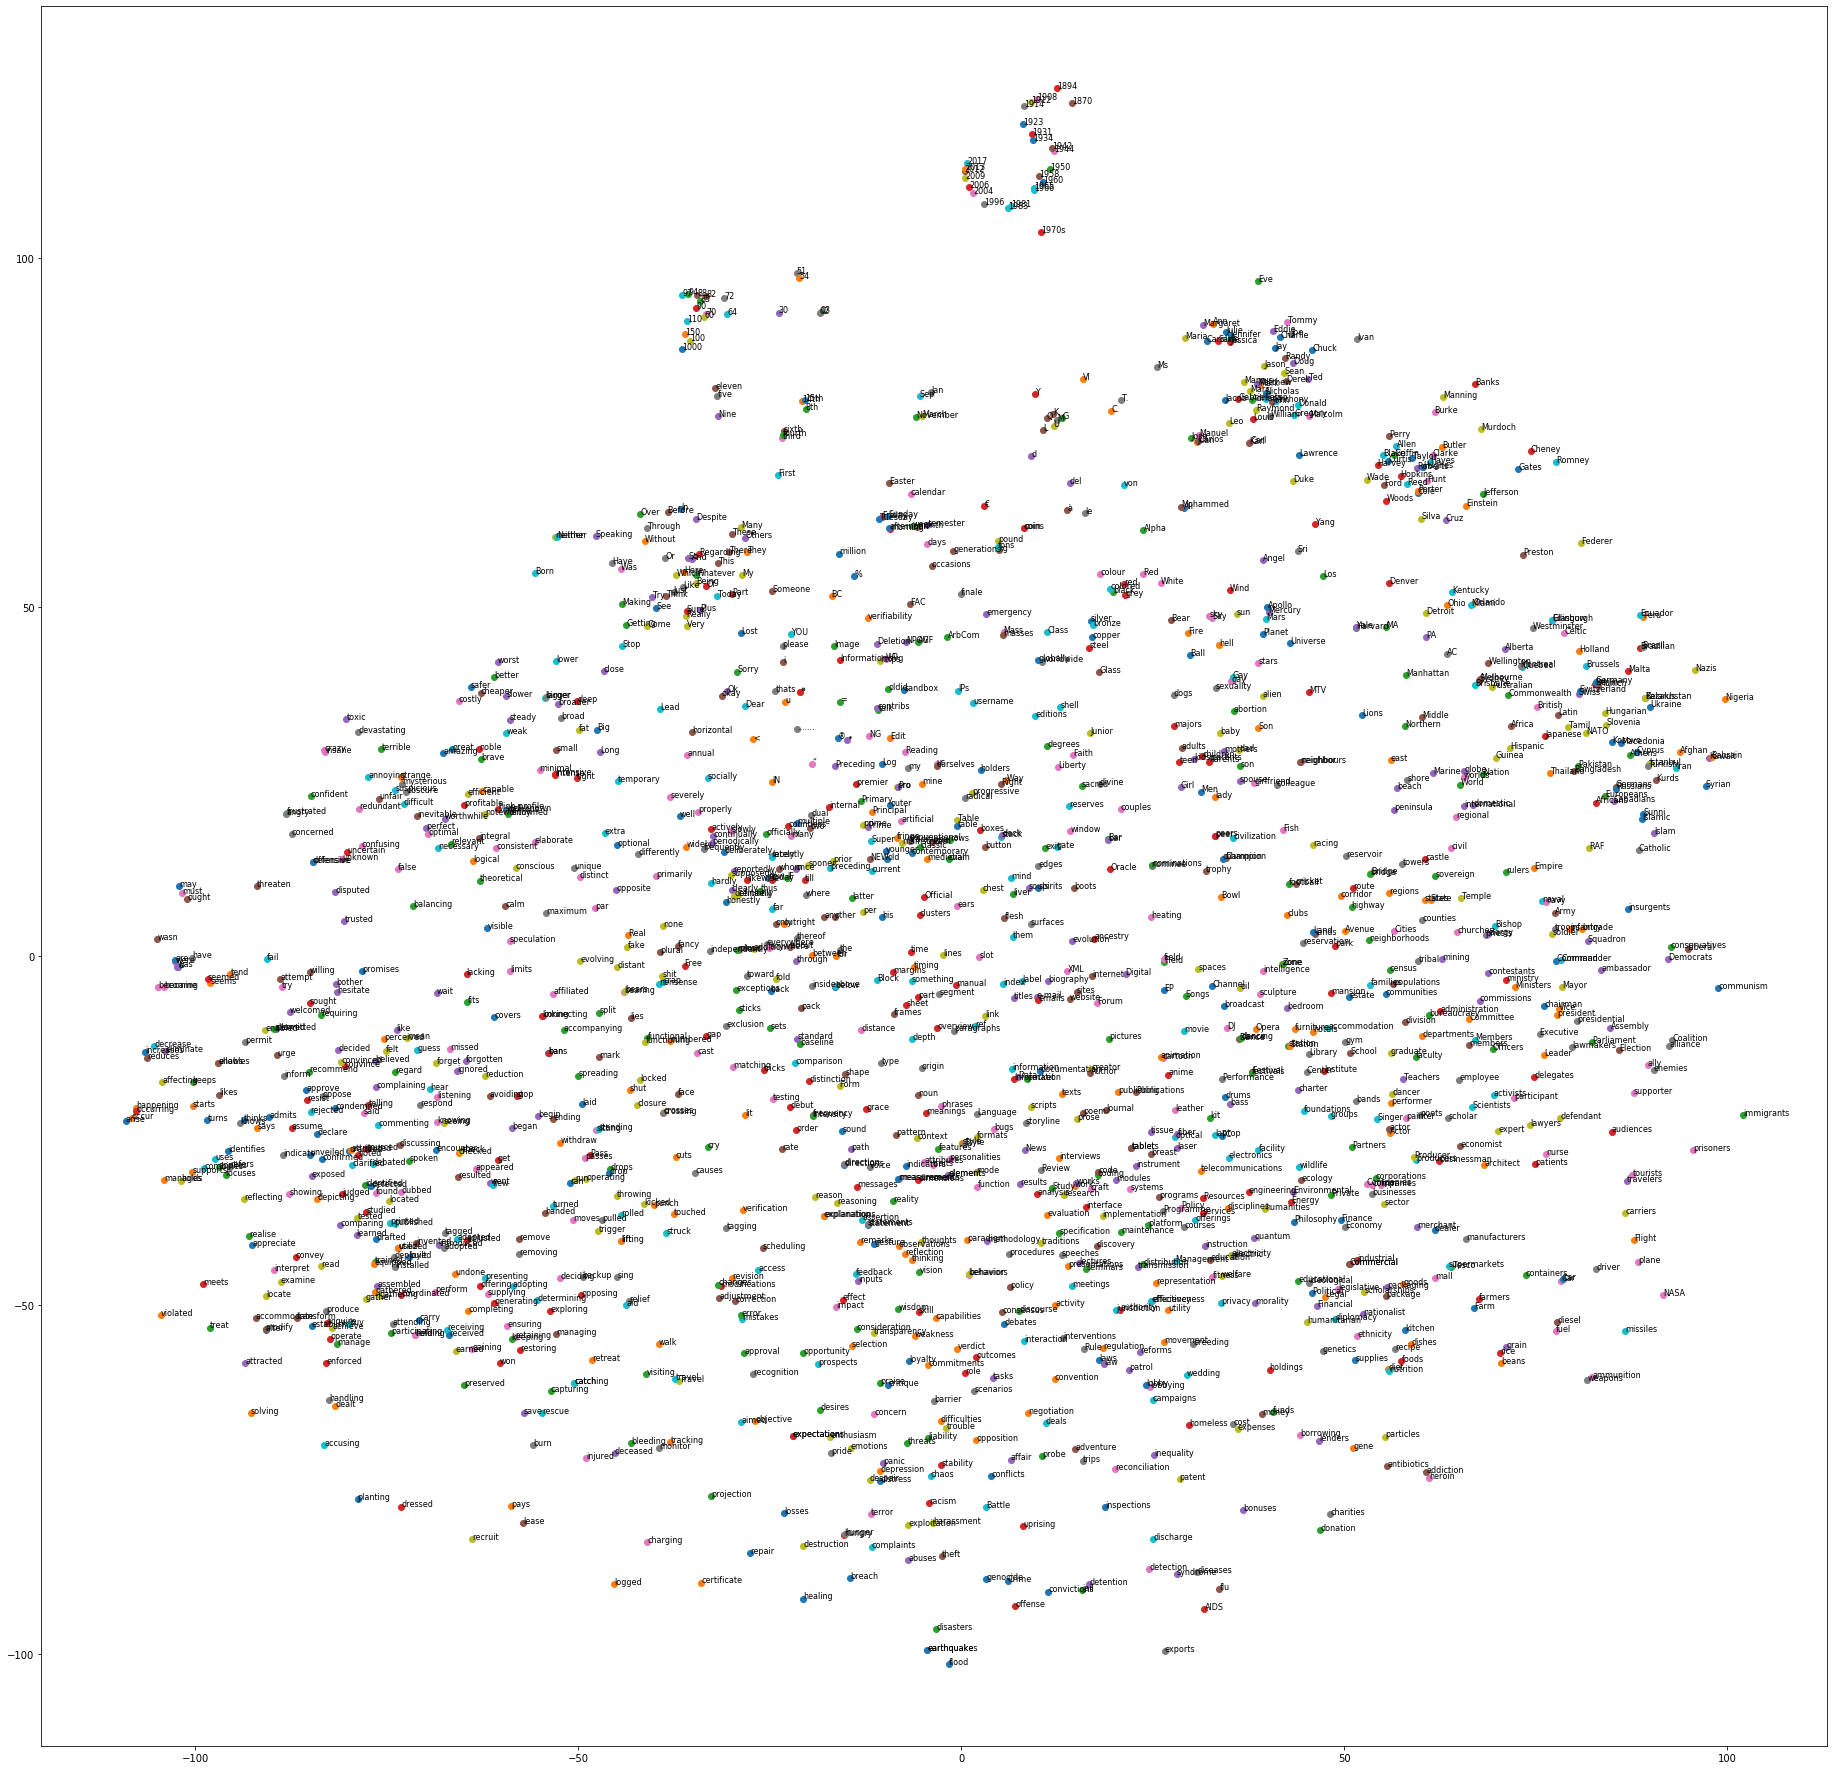

In [12]:
tsne_plot(ft_model)

And as we can see, although it's a bit messy, it has generated some fairly intuitive clusters capturing human-recognizable categories, ranging from the abstract to the concrete:

* First names
    ![names](images/names.png)
* Familial relations
    ![family](images/family.png)
* Transportation Methods
    ![transport](images/transport.png)
* Countries (even grouped by continent for the most part)
    ![countries](images/countries.png)
* Political Terms, somewhat grouped by type (voting systems, governmental positions, political ideologies)
    ![politics](images/politics.png)

and so on...